# Pytorch

PyTorch是Python中最受欢迎的深度学习框架之一，特别是在研究人员中。W&B为PyTorch提供一流的支持，从记录梯度到在CPU和GPU上分析代码。


## Logging gradients with wandb.watch

要自动记录梯度，您可以调用 `wandb.watch` 并传递您的 PyTorch 模型。

```python
import wandb
wandb.init(config=args)

model = ... # set up your model

# Magic
wandb.watch(model, log_freq=100)

model.train()
for batch_idx, (data, target) in enumerate(train_loader):
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % args.log_interval == 0:
        wandb.log({"loss": loss})
```

如果您需要在同一脚本中跟踪多个模型，您可以在每个模型上单独调用 `wandb.watch`。

> 在前向和反向传播后调用 `wandb.log` 之前，不会记录梯度、指标和 graph。

## Logging images and media

您可以将 PyTorch `Tensor` 传递给 `wandb.Image`， 并且torchvision 的 utilities 将自动将其转换为图像：

```python
images_t = ...  # generate or load images as PyTorch Tensors
wandb.log({"examples" : [wandb.Image(im) for im in images_t]})
```

有关在 PyTorch 和其他框架中将富媒体记录到W&B的更多信息，请查看我们的媒体日志记录指南。

如果您还想 include information alongside media，例如模型的预测或派生指标，请使用 `wandb.Table`。


```python
my_table = wandb.Table()

my_table.add_column("image", images_t)
my_table.add_column("label", labels)
my_table.add_column("class_prediction", predictions_t)

# Log your Table to W&B
wandb.log({"mnist_predictions": my_table})
```


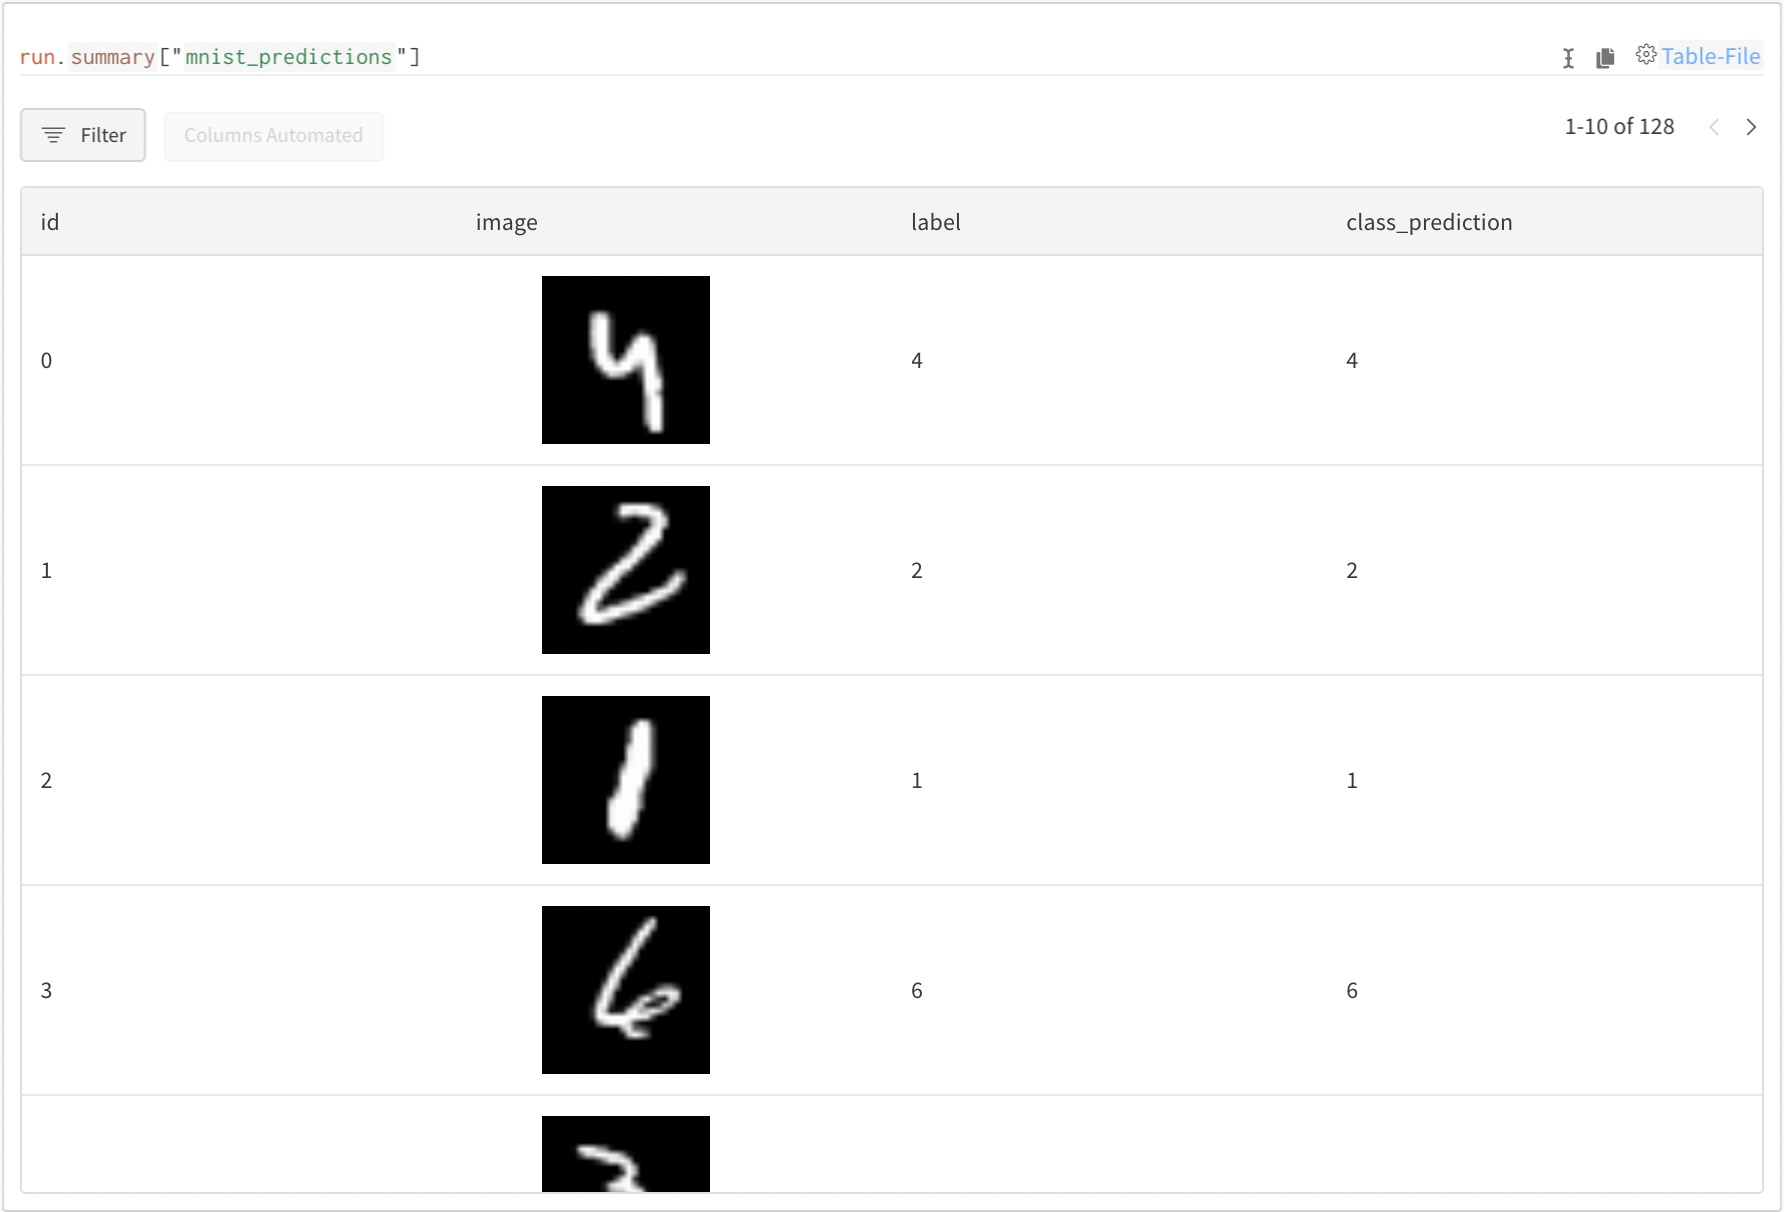

## Profiling PyTorch code

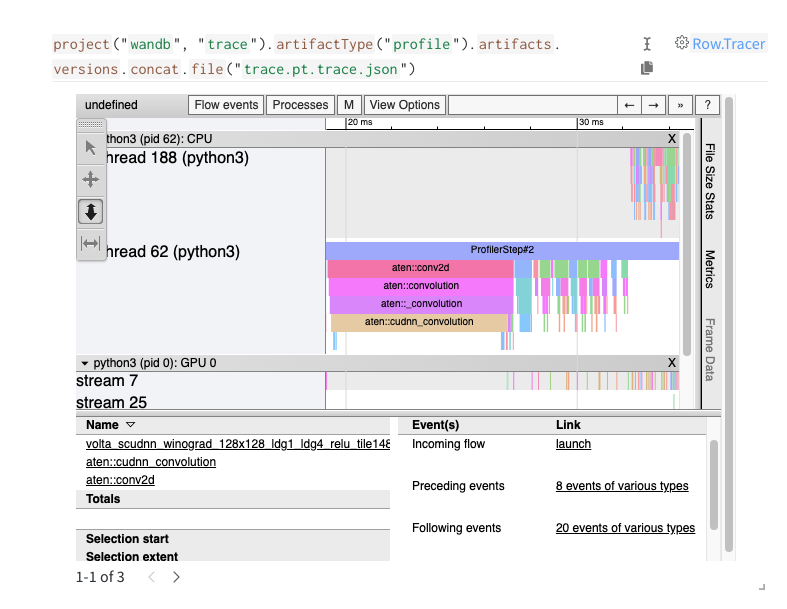


W&B 直接与 PyTorch Kineto 的 Tensorboard 插件集成，以提供分析PyTorch代码、检查CPU和GPU通信细节以及识别瓶颈和优化的工具。

```python
profile_dir = "path/to/run/tbprofile/"
profiler = torch.profiler.profile(
    schedule=schedule,  # see the profiler docs for details on scheduling
    on_trace_ready=torch.profiler.tensorboard_trace_handler(profile_dir)
    with_stack=True)

with profiler:
    ...  # run the code you want to profile here
    # see the profiler docs for detailed usage information

# create a wandb Artifact
profile_art = wandb.Artifact("trace", type="profile")
# add the pt.trace.json files to the Artifact
profile_art.add_file(glob.glob(profile_dir + ".pt.trace.json"))
# log the artifact
profile_art.save()
```

> 交互式跟踪查看工具基于 Chrome Trace Viewer，该工具最适合Chrome浏览器。